### <b>[RQ1]</b> After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
#UPLOADING POSTS.CSV
fields = ["post_type", "numbr_likes","number_comments"]
data_post_test= pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = fields)
#DATA CLEANING 
data_post_test.numbr_likes.fillna(0, inplace = True)
#ASSIGNING VARIABLES
likes = data_post_test.numbr_likes
post_type = data_post_test.post_type
data_post_test.head(2)

,post_type,numbr_likes,number_comments
0,2,80.0,0.0
1,1,25.0,1.0


## Variables and data types

Here we can observe the different data types of the variables. However, since variables post_type, numbr_likes and number_comments are discrete, we can transform them into integer values.

In [6]:
data_post_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   post_type        int64  
 1   numbr_likes      float64
 2   number_comments  float64
dtypes: float64(2), int64(1)
memory usage: 977.6 MB


## Variable Distributions

<b>1. POST TYPES</b> <br>
<i>Summary Statistics</i><br>
This is a categorical variable which indicates the kind of post a user has published (1: photo, 2: video, 3: mixed). The mean is very close to 1, which means that photos are the most common type of mosted. In fact, at least 75% of the users choosed pictures as post type.

In [7]:
post_type.describe().apply(lambda x: format(x, 'f'))

count    42710197.000000
mean            1.028486
std             0.172023
min             1.000000
25%             1.000000
50%             1.000000
75%             1.000000
max             3.000000
Name: post_type, dtype: object

When plotting the distribution of the variable, we obtain this graph with y*10^7 in the y axis and the different post_types in the x axis :

Photos represent 0.972 % of the dataset.
Videos represent 0.027 % of the dataset.
Mixed content represent 0.001 % of the dataset.


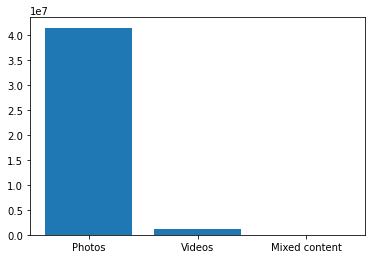

In [47]:
post,count = np.unique(post_type.values, return_counts=True)
postype = ["Photos","Videos","Mixed content"]
plt.bar(postype,count)
perc = count/42710197
[print(postype[i], "represent" , round(perc[i],3), "% of the dataset.") for i in range(len(perc))][0]

##### <b>2. NUMBER OF LIKES</b>

<i>Summary Statistics</i>
<br>
"numbr_likes" is a numerical discrete variable that indicates the amount of likes a certain post has obtained. By looking at the main summary values from the distribution we observe a big range from 0 to near 8M likes. However, 75% of the values lay below 114 likes and the mode is 12 likes. This suggests that the current mean (283) might not the best measure of expection for this distribution (this value is probably to high) and that for a better summary of the distribution, outliers should be identified.

In [51]:
print("mode          ", likes.mode()[0])
likes.describe().apply(lambda x: format(x, 'f'))

mode           12.0


count    42710197.000000
mean          283.502807
std          6124.608652
min             0.000000
25%            20.000000
50%            46.000000
75%           114.000000
max       8822952.000000
Name: numbr_likes, dtype: object

<i>Outliers</i>
<br>
In the output below, by obtaining the higher quantiles of the distribution we can clearly observe the <b>presence of outliers</b>. The quantile at percentile 0.95 shows that 95% of the total dataset posts(40,574.687) have received less than 471 likes.  
By using the Interquartile Rule to Find Outliers we find out that in the right tail of the distribution, around 10% of the population are outliers. **This is an extremely high number of outliers**, which we believe is related to the nature of the distribution (close to an exponential) and the big sample size, which shows a high variation of likes in the population.<br>

* IQR * 1.5 + Q3 = (114-20) * 1.5 + 114  = 255 <br>
* Percentile 90 = 256 <br>
* Therefore, 10% of the right tail of the distribution can be consider outliers

206770
Percentile       Quantile
0.500000         46.000000
0.900000        256.000000
0.950000        471.000000
0.990000       2875.000000
0.999000      30636.000000
0.999900     181821.941200
0.999999    2028103.073639
1.000000    8822952.000000
Name: numbr_likes, dtype: object


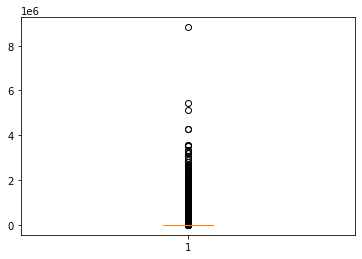

In [50]:
print(likes[likes == 0].count())
print("Percentile       Quantile")
print(likes.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]).apply(lambda x: format(x, 'f')))
plt.boxplot(likes)
plt.show()

<i>Distribution of the Variable</i>
<br>
When ploting the distribution we observe its exponential nature, with a highly positive skew and leptokurtosis. In this barplot we "zoom" on the 95% left tail of the distribution, because it is more representative of the sample population.

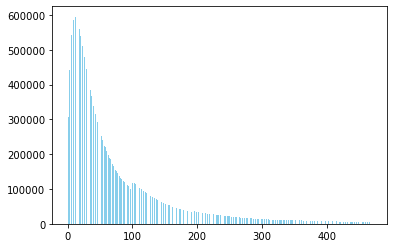

In [63]:
likes = data_post_test.numbr_likes
new_axis = likes[likes < 471]
unique,counts = np.unique(data_post_test.numbr_likes.values, return_counts=True)
try:
    plt.hist(new_axis,  bins='auto', normed=True , color = "skyblue")
except AttributeError:
    pass

<StemContainer object of 3 artists>

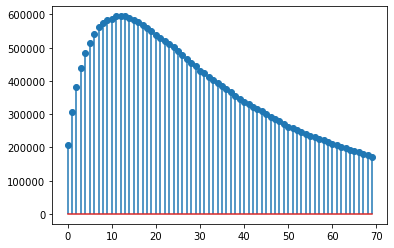

In [61]:
plt.stem(unique[0:70],counts[0:70])

## Correlation

In [55]:
data_post_test.corr()

,post_type,numbr_likes,number_comments
post_type,1.000000,0.002544,0.002800
numbr_likes,0.002544,1.000000,0.374453
number_comments,0.002800,0.374453,1.000000
